In [4]:
import numpy as np

train_input = np.load("/home/daniel/catkin_ws/src/moldy/case_studies/inverted_pendulum/data/train_inputdata.npy")
train_output = np.load("/home/daniel/catkin_ws/src/moldy/case_studies/inverted_pendulum/data/train_outputdata.npy")
validation_input = np.load("/home/daniel/catkin_ws/src/moldy/case_studies/inverted_pendulum/data/validation_inputdata.npy")
validation_output = np.load("/home/daniel/catkin_ws/src/moldy/case_studies/inverted_pendulum/data/validation_outputdata.npy")

print(f"train_input.shape: {train_input.shape}")
print(f"train_output.shape: {train_output.shape}")
print(f"validation_input.shape: {validation_input.shape}")
print(f"validation_output.shape: {validation_output.shape}")

train_input.shape: (4000, 3)
train_output.shape: (4000, 2)
validation_input.shape: (1000, 3)
validation_output.shape: (1000, 2)


In [5]:
print(f"train_input[0]: {train_input[0]}")
print(f"train_output[0]: {train_output[0]}")
print(f"validation_input[0]: {validation_input[0]}")
print(f"validation_output[0]: {validation_output[0]}")

train_input[0]: [-0.67681295 -1.          0.        ]
train_output[0]: [ 0.00015379 -0.03383558]
validation_input[0]: [-0.67681295 -1.          0.        ]
validation_output[0]: [ 0.00015379 -0.03383558]


In [6]:
print(f"Max train_input: {np.max(train_input, axis=0)}")
print(f"Min train_input: {np.min(train_input, axis=0)}")
print(f"Max train_output: {np.max(train_output, axis=0)}")
print(f"Min train_output: {np.min(train_output, axis=0)}")
print(f"Max validation_input: {np.max(validation_input, axis=0)}")
print(f"Min validation_input: {np.min(validation_input, axis=0)}")
print(f"Max validation_output: {np.max(validation_output, axis=0)}")
print(f"Min validation_output: {np.min(validation_output, axis=0)}")

Max train_input: [-0.40332684 -1.          0.        ]
Min train_input: [-0.67681295 -1.         -1.        ]
Max train_output: [ 0.00015379 -0.0201679 ]
Min train_output: [-0.00019147 -0.03383558]
Max validation_input: [-0.5394417 -1.         0.       ]
Min validation_input: [-0.67681295 -1.          0.        ]
Max validation_output: [ 0.00015379 -0.02696805]
Min validation_output: [ 0.00012241 -0.03383558]


In [7]:
print(f"Mean train_input: {np.mean(train_input, axis=0)}")
print(f"Mean train_output: {np.mean(train_output, axis=0)}")
print(f"Mean validation_input: {np.mean(validation_input, axis=0)}")
print(f"Mean validation_output: {np.mean(validation_output, axis=0)}")


Mean train_input: [-0.49968097 -1.         -0.29      ]
Mean train_output: [ 3.132599e-05 -2.498235e-02]
Mean validation_input: [-0.60551995 -1.          0.        ]
Mean validation_output: [ 0.00013749 -0.03027146]


In [11]:
from moldy.src.inverted_pendulum.model_and_control.model_ip import InvertedPendulum

ip = InvertedPendulum()

x0 = ip.generate_random_state(True)

print(x0)

[[ 0.        ]
 [-3.14159265]]


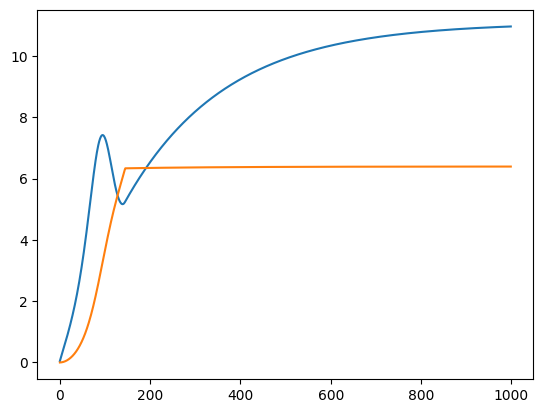

In [12]:
xs = np.zeros((1000, 2))
x0 = np.array([0.0, 0.0]).reshape(-1,1)
for i in range(1000):
    x0 = ip.forward_simulate_dt(x0, 1.0, 0.01)
    xs[i] = x0.flatten()

import matplotlib.pyplot as plt

plt.plot(xs[:, 0])
plt.plot(xs[:, 1])